In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
#load the dataset
absorb_df = pd.read_csv('Absorbent Measurement Analysis.csv')
absorb_df

,Group,ID,96-well position,Absorbance
0,Control,1,B2,0.55
1,Control,2,B3,0.80
2,Control,3,B4,0.65
3,Control,4,B5,0.60
4,Control,5,B6,0.54
5,Control,6,B7,0.40
6,Treated,7,C2,0.35
7,Treated,8,C3,0.40
8,Treated,9,C4,0.24
9,Treated,10,C5,0.50


<h1 align = 'center'> Absorbent Measurement for Cell Toxicity Results </h1>

## Descriptive Statistics

In [3]:
#Calculate basic descriptive statistics for absorbance values such as mean, median, standard deviation, minimum and maximum values
absorb_df.describe()

,Absorbance
count,12.000000
mean,0.481667
std,0.155261
min,0.240000
25%,0.387500
50%,0.450000
75%,0.562500
max,0.800000


## Comparison of Control and Treatment Groups

Group
Control    0.590000
Treated    0.373333
Name: Absorbance, dtype: float64


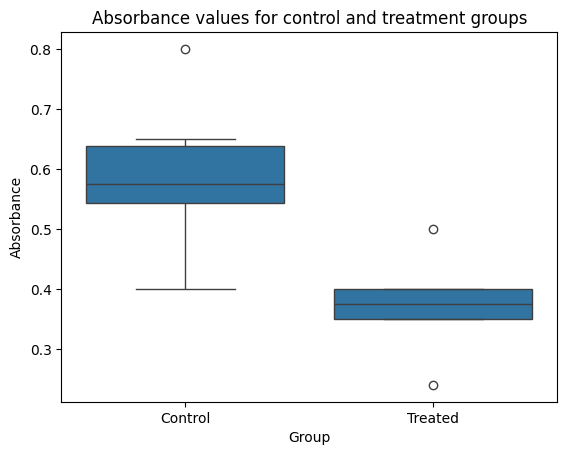

In [5]:
# Ensure 'Absorbance' column is numeric
absorb_df['Absorbance'] = pd.to_numeric(absorb_df['Absorbance'], errors='coerce')

# Compare the mean absorbance values between the control and treatment groups
print(absorb_df.groupby('Group')['Absorbance'].mean())

# Visualize the distribution of absorbance values for the control and treatment groups
sns.boxplot(x='Group', y='Absorbance', data=absorb_df)
plt.title('Absorbance values for control and treatment groups')
plt.show()

                  Test  Statistic   p-value
0               t-test   3.365572  0.007175
1  Mann-Whitney U test  34.000000  0.012281


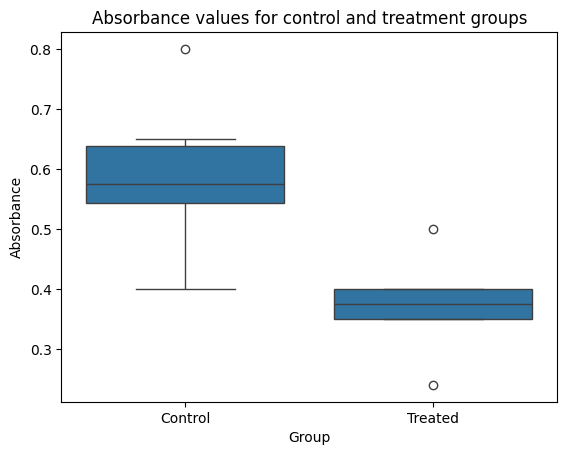

In [8]:
#  Statistical tests, such as t-tests or Mann-Whitney U tests, can be employed to assess if there are significant differences between the groups
from scipy.stats import ttest_ind, mannwhitneyu

# Perform t-test
control_group = absorb_df[absorb_df['Group'] == 'Control']['Absorbance']
treatment_group = absorb_df[absorb_df['Group'] == 'Treated']['Absorbance']

t_stat, p_value = ttest_ind(control_group, treatment_group)

# Perform Mann-Whitney U test
u_stat, p_value_u = mannwhitneyu(control_group, treatment_group)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
      'Test': ['t-test', 'Mann-Whitney U test'],
      'Statistic': [t_stat, u_stat],
      'p-value': [p_value, p_value_u]
})

print(results_df)

# Visualize the distribution of absorbance values for the control and treatment groups
sns.boxplot(x='Group', y='Absorbance', data=absorb_df)
plt.title('Absorbance values for control and treatment groups')
plt.show()

## Correlation Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'concentration' and 'exposure_duration' are the other relevant columns
correlation_matrix = absorb_df[['Absorbance', '96-well position']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'B2'

## Dose response Relationship

In [14]:
from scipy.optimize import curve_fit

# Ensure 'Absorbance' column is numeric and drop NaN values
absorb_df['Absorbance'] = pd.to_numeric(absorb_df['Absorbance'], errors='coerce')

# Define the dose-response function
def dose_response(x, a, b):
      return a * x + b

x_data = absorb_df['96-well position']
y_data = absorb_df['Absorbance']

# Check if ydata is empty
if y_data.empty:
      print("ydata is empty.")
else:
      # Fit the curve
      popt, pcov = curve_fit(dose_response, x_data, y_data)

      # Plot the data and the fitted curve
      plt.scatter(x_data, y_data, label='Data')
      plt.plot(x_data, dose_response(x_data, *popt), label='Fitted curve')
      plt.legend()
      plt.show()

ydata is empty.


In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a function for the dose-response relationship
def dose_response(x, a, b, c):
      return a / (1 + np.exp(-b * (x - c)))

# Assuming '96-well position' represents different concentrations
x_data = absorb_df['96-well position']
y_data = absorb_df['Absorbance']

# Fit the curve
popt, pcov = curve_fit(dose_response, x_data, y_data)

# Plot the data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, dose_response(x_data, *popt), 'r-', label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('Concentration')
plt.ylabel('Absorbance')
plt.legend()
plt.show()

C:\Users\DONKAMS\AppData\Local\Temp\ipykernel_20364\3333251255.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_group, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Control')
c:\Python312\Lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Python312\Lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `f

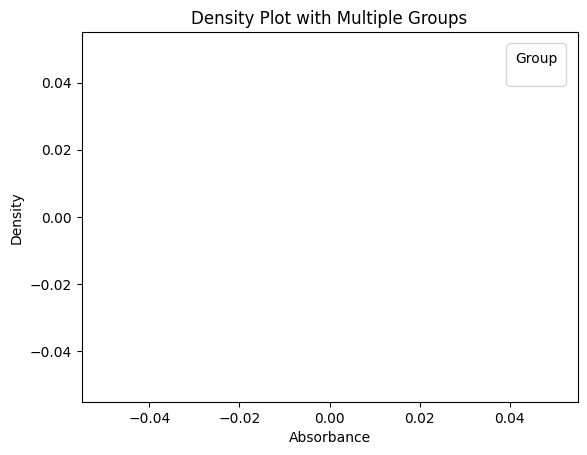

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Separate the data into control and treated groups
control_group = absorb_df[absorb_df['Group'] == 'Control']['Absorbance']
treated_group = absorb_df[absorb_df['Group'] == 'Treated']['Absorbance']

# Create distribution plots
sns.distplot(control_group, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Control')
sns.distplot(treated_group, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Treated')

plt.legend(prop={'size': 16}, title = 'Group')
plt.title('Density Plot with Multiple Groups')
plt.xlabel('Absorbance')
plt.ylabel('Density')

plt.show()

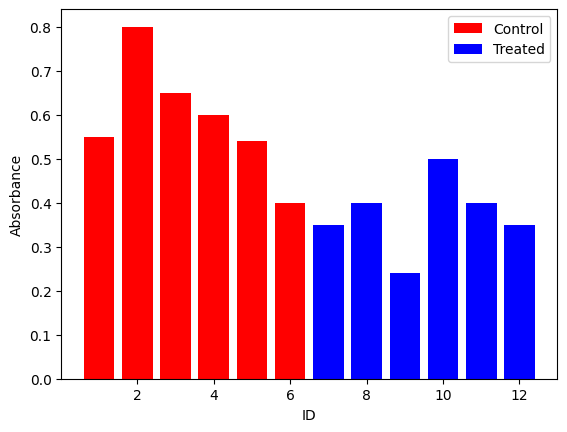

In [19]:
# Filter DataFrames
control_df = absorb_df[absorb_df['Group'] == 'Control']
treated_df = absorb_df[absorb_df['Group'] == 'Treated']

# Plot
plt.bar(control_df['ID'], control_df['Absorbance'], color='red', label='Control')
plt.bar(treated_df['ID'], treated_df['Absorbance'], color='blue', label='Treated')

plt.xlabel('ID')
plt.ylabel('Absorbance')
plt.legend()
plt.show()